# Webtask Demo: E-commerce Shopping Cart

This notebook demonstrates automated web interaction using Webtask to add items to a shopping cart.

## 1. Setup

Install dependencies and import required libraries.

In [1]:
!pip install -e .. 

Obtaining file:///home/stevewang/Github/web-auto

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
ERROR: file:///home/stevewang/Github/web-auto does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [2]:
from dotenv import load_dotenv
from IPython.display import Image, display

# Load environment variables from .env file
load_dotenv()

True

## 2. Initialize Webtask Agent

Create a Webtask instance and configure the LLM.

In [3]:
from webtask import Webtask
from webtask.integrations.llm.openai import OpenAILLM

wt = Webtask()
# OpenAILLM will automatically read OPENAI_API_KEY from environment
llm = OpenAILLM.create(model="gpt-4.1")

/home/stevewang/Github/web-auto/webtask/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Create agent with 2 second delay between actions to allow pages to load
agent = await wt.create_agent(llm=llm, action_delay=3.0)

## 3. Initial State

Navigate to the website and capture the starting state.

Screenshot BEFORE task execution:


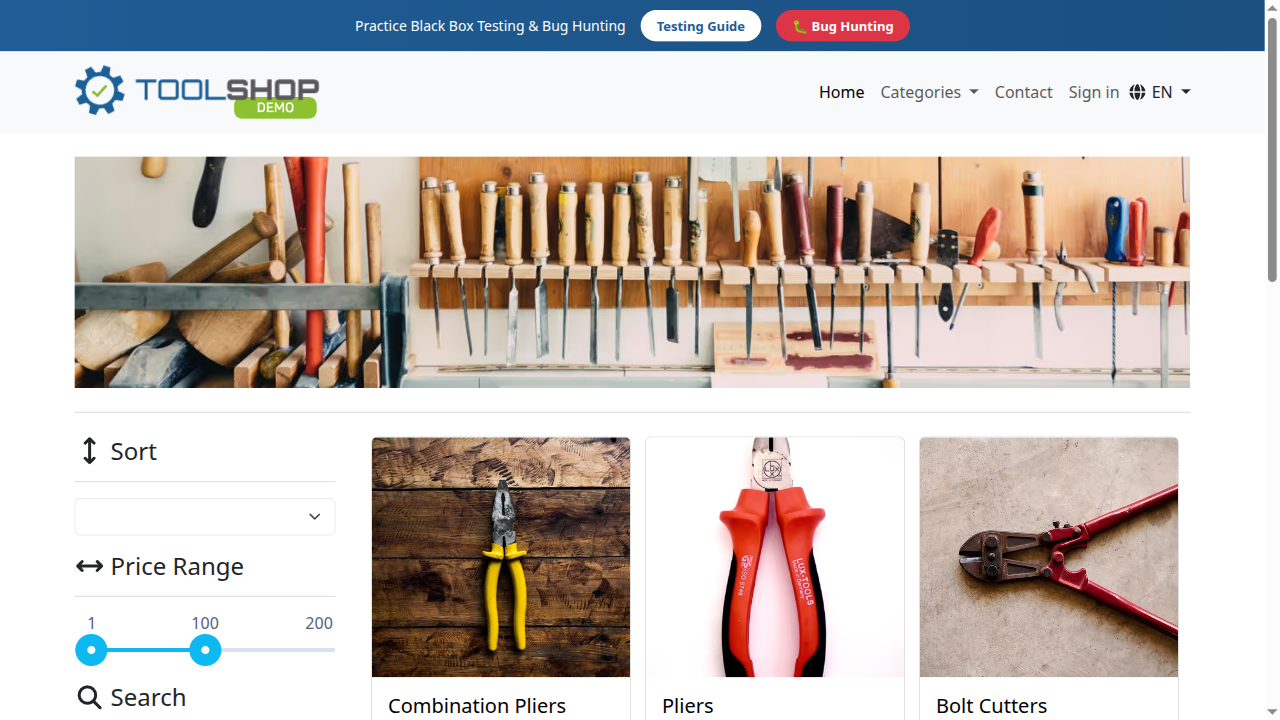

In [5]:
# Navigate to the starting page first
await agent.navigate("https://practicesoftwaretesting.com/")
await agent.wait_for_idle()

# Take screenshot before starting the task
print("Screenshot BEFORE task execution:")
await agent.screenshot("before_task.png")
display(Image(filename="before_task.png", width=800))

## 4. Execute Task

Run the agent to add items to the shopping cart.

In [6]:
# Execute the task step by step
agent.set_task("add 2 Flat-Head Wood Screws and 5 cross-head screws to the cart, and proceed to checkout page")

max_steps = 10
for i in range(max_steps):
    print(f"\n=== Executing Step {i+1} ===")
    step = await agent.run_step()

    print(f"Proposals: {len(step.proposals)}")
    for j, action in enumerate(step.proposals, 1):
        print(f"  Action {j}: {action.tool_name} - {action.reason}")

    print(f"Verification: {'Complete' if step.verification.complete else 'Incomplete'}")
    print(f"Message: {step.verification.message}")

    if step.verification.complete:
        print(f"\n✓ Task completed in {i+1} steps!")
        break
else:
    print(f"\n✗ Task not completed after {max_steps} steps")


=== Executing Step 1 ===
Proposals: 2
  Action 1: fill - Use the search bar to find 'screw' products since Flat-Head Wood Screws and cross-head screws are not visible in the current list.
  Action 2: click - Submit the search to display relevant screw products.
Verification: Incomplete
Message: You have successfully searched for 'screw' and now the relevant products are visible, including 'Flat-Head Wood Screws' and 'Cross-head screws'. The next steps are: 1) Add 2 Flat-Head Wood Screws to the cart, 2) Add 5 Cross-head screws to the cart, and 3) Proceed to the checkout page. None of these actions have been completed yet.

=== Executing Step 2 ===
Proposals: 2
  Action 1: click - Select Flat-Head Wood Screws to set quantity and add to cart.
  Action 2: click - Select Cross-head screws to set quantity and add to cart.
Verification: Incomplete
Message: The task is not complete. Only the Flat-Head Wood Screws section has been interacted with. Actions required: 1) Set quantity for Flat-Hea

## 5. Final State

Capture the final state after task completion.

Screenshot AFTER task execution:


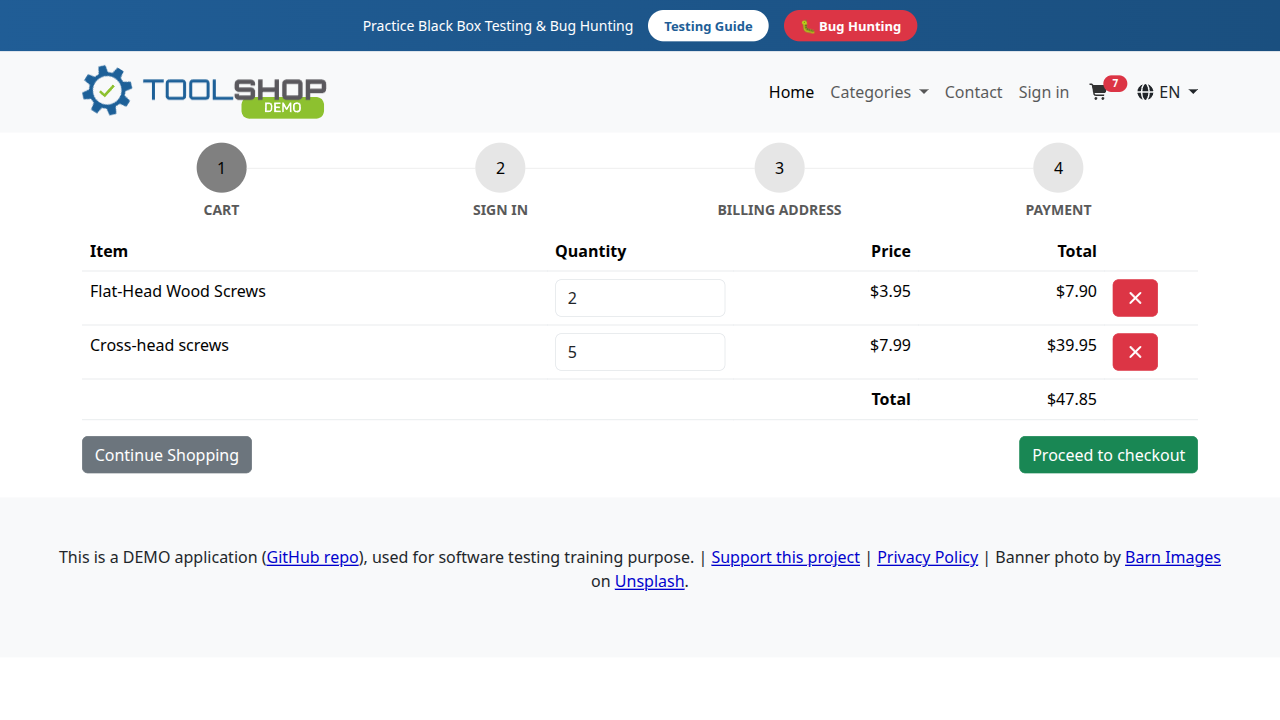

In [7]:
# Take screenshot after task completion
print("Screenshot AFTER task execution:")
await agent.screenshot("after_task.png")
display(Image(filename="after_task.png", width=800))